# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [1]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')

#  Summary statistics

Inspect the data.

In [3]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [4]:
##tabulate college and union status

df = pd.DataFrame()
df ['union'] = data['union']
df ['coll_grad'] = data['collgrad']

In [5]:
##generate a variable for log hours worked
df ['log_hours'] = np.log(data['hours'])

Text(0.5, 0, 'Years')

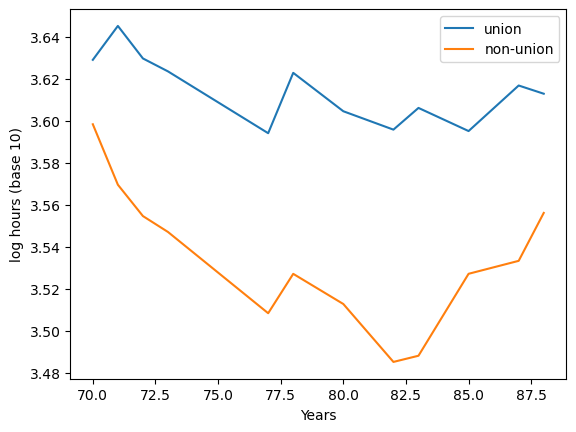

In [6]:
# Generate variable for year
df ['year'] = data['year']

##plot log hours against year separately for union and non-union
import seaborn as sns

sns.lineplot( x = df.year , y = df.log_hours[df.union == 1], errorbar = None)
sns.lineplot( x = df.year , y = df.log_hours[df.union == 0], errorbar = None)
plt.legend(labels=["union","non-union"])
plt.ylabel('log hours (base 10)')
plt.xlabel('Years')


# Regression: Effect of union status on hours worked

Running the regression with the log of the dependent variable allows us to interpret the coefficient in terms of percentage change. In our example, on average being a union worker is associated with an increase in hours worked by $100\hat{\beta}_1 \approx 8.37\%$ ($100(e^{\hat{\beta}_1}-1)=8.73$)

In [7]:
##Regress hours worked against union status and display the results
res = smf.ols('log_hours ~ union', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_hours   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     147.5
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           8.08e-34
Time:                        20:33:37   Log-Likelihood:                -9865.7
No. Observations:               19202   AIC:                         1.974e+04
Df Residuals:                   19200   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5270      0.003   1057.147      0.000       3.521       3.534
union          0.0837      0.007     12.145      0.000       0.070       0.097
==============================================================================
Omnibus:                    13206.652   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188252.342
Skew:                          -3.212   Prob(JB):                         0.00
Kurtosis:                      16.930   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
print('Coefficient: ', res.params[1])
print('S.E.: ', res.bse[1])
print('t-stat: ', res.tvalues[1])
print('p-value: ', res.pvalues[1])
res.conf_int(alpha=0.05, cols=None)

Coefficient:  0.06088038169847358
S.E.:  0.006957620334140023
t-stat:  8.75017301529698
p-value:  2.305476263688572e-18


,0,1
Intercept,3.463928,3.481044
union,0.047243,0.074518
coll_grad,0.027224,0.056041
tenure,0.011657,0.014462


#### What is the identification assumption for the coefficient on union to be causal?





Assume that there are no variables that affects both hours worked and union status, and that there is no reverse causality (no effect of hours worked on union status). <br><br> The former assumption is unrealistic as there may be many factors, both observable and unobservable, that are correlated with being in a union and with the number of hours worked. For instance, living in a specific city may be correlated both with higher probability of being in a union and with a higher number of hours worked. Thus, the purpose of the following analysis is to <i>clean</i> the effect of union as much as possible

In [10]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
res = smf.ols('log_hours ~ union + coll_grad', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_hours   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.64
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.70e-42
Time:                        20:33:38   Log-Likelihood:                -9844.0
No. Observations:               19202   AIC:                         1.969e+04
Df Residuals:                   19199   BIC:                         1.972e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5183      0.004    980.244      0.000       3.511       3.525
union          0.0806      0.007     11.689      0.000       0.067       0.094
coll_grad      0.0486      0.007      6.590      0.000       0.034       0.063
==============================================================================
Omnibus:                    13269.332   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190671.205
Skew:                          -3.230   Prob(JB):                         0.00
Kurtosis:                      17.020   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
## add occupation codes to the regression and compare the results with the previous one
df ['occ_code'] = data['occ_code']
res = smf.ols('log_hours ~ union + coll_grad + C(occ_code)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_hours   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     110.1
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          2.32e-308
Time:                        20:38:48   Log-Likelihood:                -9153.3
No. Observations:               19129   AIC:                         1.834e+04
Df Residuals:                   19114   BIC:                         1.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5113      0.009    370.285      0.000       3.493       3.530
C(occ_code)[T.2.0]      0.1697      0.014     12.294      0.000       0.143       0.197
C(occ_code)[T.3.0]      0.0280      0.010      2.781      0.005       0.008       0.048
C(occ_code)[T.4.0]     -0.1737      0.017    -10.440      0.000      -0.206      -0.141
C(occ_code)[T.5.0]      0.1399      0.023      6.003      0.000       0.094       0.186
C(occ_code)[T.6.0]      0.1085      0.012      8.969      0.000       0.085       0.132
C(occ_code)[T.7.0]     -0.5488      0.025    -21.809      0.000      -0.598      -0.500
C(occ_code)[T.8.0]     -0.0900      0.012     -7.487      0.000      -0.114      -0.066
C(occ_code)[T.9.0]     -0.1823      0.226     -0.808      0.419      -0.625       0.260
C(occ_code)[T.10.0]     0.0426      0.054      0.796      0.426      -0.062       0.147
C(occ_code)[T.11.0]     0.0452      0.038      1.178      0.239      -0.030       0.120
C(occ_code)[T.12.0]     0.1668      0.175      0.953      0.340      -0.176       0.510
C(occ_code)[T.13.0]     0.0581      0.014      4.108      0.000       0.030       0.086
union                   0.0541      0.007      7.792      0.000       0.040       0.068
coll_grad               0.0299      0.009      3.249      0.001       0.012       0.048
==============================================================================
Omnibus:                    12822.217   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188096.547
Skew:                          -3.080   Prob(JB):                         0.00
Kurtosis:                      17.073   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?


Occupation is likely to be a collider: the occupation choice may be influenced by both the number of hours worked in that job and the probability of joining a union for workers in that occupation. 

#### What are "good controls" in the dataset in terms of being exogenous to union status?


Tenure is a good control to add - the tenured status of a worker affects both their participation in a union and the responsibility (hours required) in their given role.

In [17]:
##add these controls to the regression
df ['age'] = data['age']
df ['msp'] = data['msp']
df ['not_smsa'] = data['not_smsa']
df ['c_city'] = data['c_city']
df ['south'] = data['south']

res = smf.ols('log_hours ~ union + coll_grad + age + msp + not_smsa + c_city + south', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_hours   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     132.4
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          3.84e-191
Time:                        20:42:21   Log-Likelihood:                -9480.9
No. Observations:               19180   AIC:                         1.898e+04
Df Residuals:                   19172   BIC:                         1.904e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6427      0.016    229.583      0.000       3.612       3.674
union          0.0884      0.007     12.889      0.000       0.075       0.102
coll_grad      0.0577      0.007      7.896      0.000       0.043       0.072
age           -0.0027      0.000     -5.771      0.000      -0.004      -0.002
msp           -0.1292      0.006    -21.499      0.000      -0.141      -0.117
not_smsa       0.0023      0.007      0.320      0.749      -0.012       0.017
c_city         0.0021      0.007      0.300      0.764      -0.011       0.016
south          0.0854      0.006     14.253      0.000       0.074       0.097
==============================================================================
Omnibus:                    13067.788   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189687.799
Skew:                          -3.159   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How do these change your estimates?


All demographic variables (age, race, place of living, etc.) can be considered as good controls as the decision about joining a union cannot affect these variables. The estimate doesn't change by much and, most importantly, the sign is consistent across all specifications hinting towards a positive effect of union status on hours worked.

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

Link: https://www.freemalaysiatoday.com/category/nation/2022/02/04/shift-focus-to-covid-19-hospitalisation-rates-says-expert/

During the COVID 19 pandemic, Malaysia was controlling lockdown status by tracking the number of positive cases in the country. However, as vaccines were being rolled out,  health experts urged the government to sharpen its focus on Covid-19 hospitalisation rates to help the public keep tabs on the emergence of new variants and how severe they are. This is because vaccines do not decrease the number of positive cases reported, instead they reduce the severity of the symptoms. 

This is mistake done by the health department of Malaysia, where they mistake a correlation between number of positive covid cases and the severity of the pandemic. This led to Malaysia being on of the last countries to be lifted from lockdowns. The country began to recover from the pandemic and engaged in international trades when they drew a correlation between number of hospitalizations and the lockdown status of each state.